In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing dataset
dataset=pd.read_csv("Treatment rate.csv")
pd.set_option('display.max_columns',None)

In [3]:
dataset

,Year,Time,Migrane treatment rate
0,2006,0,0.5000
1,2007,1,0.5005
2,2008,2,0.5033
3,2009,3,0.5098
4,2010,4,0.5210
5,2011,5,0.5392
6,2012,6,0.5678
7,2013,7,0.6122
8,2014,8,0.6744
9,2015,9,0.7377


In [4]:
#Segregrating the time series from the dataset
x=dataset.iloc[:,1:2]
y=dataset.iloc[:,-1:]

In [5]:
y

,Migrane treatment rate
0,0.5000
1,0.5005
2,0.5033
3,0.5098
4,0.5210
5,0.5392
6,0.5678
7,0.6122
8,0.6744
9,0.7377


In [6]:
x

,Time
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


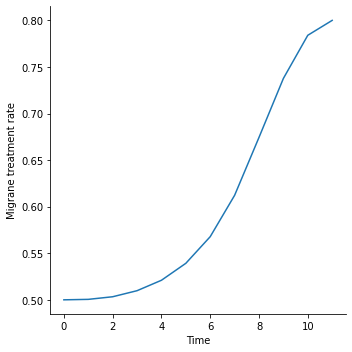

In [7]:
#plotting given migrane treatment rate
sns.relplot(x="Time", y="Migrane treatment rate", kind="line", data=dataset)

In [24]:
#Performing various exponential smoothing 
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
#performing Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(y, initialization_method="estimated").fit(smoothing_level=0.6, optimized=False)
fcast1 = fit1.forecast(9).rename("SES")
#performing Holt's additve trend
fit2 = Holt(y, initialization_method="estimated").fit()
fcast2 = fit2.forecast(9).rename("Holt's")
#performing Holt's multiplicative trend
fit3 = Holt(y, exponential=True, initialization_method="estimated").fit()
fcast3 = fit3.forecast(9).rename("Exponential")
#performing Holt's method with additive damping
fit4 = Holt(y, damped_trend=True, initialization_method="estimated").fit(damping_trend=0.9)
fcast4 = fit4.forecast(9).rename("Additive Damped")
#performing Holt's method with multiplicaive damping
fit5 = Holt(y, exponential=True, damped_trend=True, initialization_method="estimated").fit(damping_trend=0.9)
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

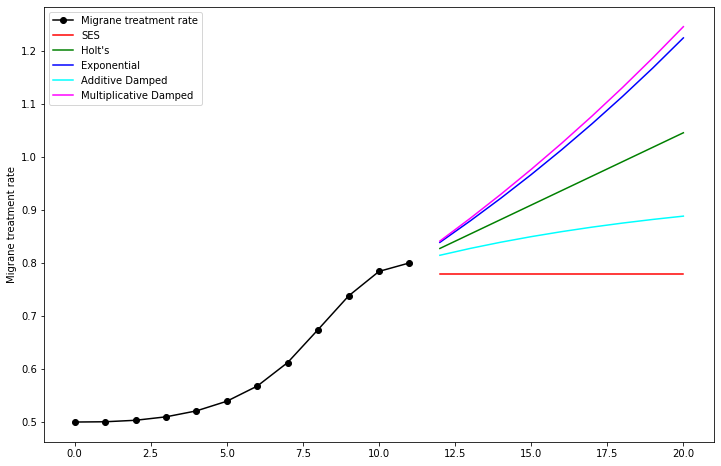

In [25]:
#plotting all the forecasts
ax = y.plot(color="black", marker="o", figsize=(12, 8))
fcast1.plot(ax=ax, color="red", legend=True)
fcast2.plot(ax=ax, color="green", legend=True)
fcast3.plot(ax=ax, color="blue", legend=True)
fcast4.plot(ax=ax, color="cyan", legend=True)
fcast5.plot(ax=ax, color="magenta", legend=True)
ax.set_ylabel("Migrane treatment rate")
plt.show()
#we can see that additive damped gives us the most convincing forecast as the trend is supposed to saturate in future

In [26]:
#Forecast values are stored in array
yhat4=fit4.forecast(17)
yhat1=fit1.forecast(17)

In [27]:
yhat4

12    0.814400
13    0.827360
14    0.839024
15    0.849522
16    0.858969
17    0.867472
18    0.875125
19    0.882013
20    0.888211
21    0.893790
22    0.898811
23    0.903330
24    0.907397
25    0.911057
26    0.914352
27    0.917317
28    0.919985
dtype: float64

In [23]:
yhat1

12    0.779936
13    0.779936
14    0.779936
15    0.779936
16    0.779936
17    0.779936
18    0.779936
19    0.779936
20    0.779936
21    0.779936
22    0.779936
23    0.779936
24    0.779936
25    0.779936
26    0.779936
27    0.779936
28    0.779936
dtype: float64

In [15]:
y_new=np.append(y,yhat4)

In [16]:
y_new

array([0.5       , 0.5005    , 0.5033    , 0.5098    , 0.521     ,
       0.5392    , 0.5678    , 0.6122    , 0.6744    , 0.7377    ,
       0.784     , 0.8       , 0.8144    , 0.82736   , 0.839024  ,
       0.8495216 , 0.85896944, 0.8674725 , 0.87512525, 0.88201273,
       0.88821145, 0.89379031, 0.89881128, 0.90333015, 0.90739714,
       0.91105742, 0.91435168, 0.91731651, 0.91998486])

In [17]:
#storing the forecasted value in a dataframe
out=pd.DataFrame({'Forecast':y_new})
final=pd.concat([x,out],axis=1)

In [18]:
out

,Forecast
0,0.500000
1,0.500500
2,0.503300
3,0.509800
4,0.521000
5,0.539200
6,0.567800
7,0.612200
8,0.674400
9,0.737700


In [19]:
#exporting final dataset into xlsx file
final.to_excel('Forecast.xlsx')